In [1]:
import pandas as pd 
import plotly.express as px  
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import matplotlib.animation as animation
import matplotlib
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns; sns.set(style='white')
from scipy.stats import pearsonr

In [2]:
places_df = pd.read_csv('data/clean_mobility_data.csv')
places_df.head()
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]


In [3]:
nationwide_df = places_df[places_df['sub_region_1'].isnull()]

raw_cases_df = pd.read_csv('data/nationwide_cases.csv')

date = pd.to_datetime(raw_cases_df['date'], format="%Y/%m/%d")
raw_cases_df['date'] = date

date = pd.to_datetime(nationwide_df['date'], format="%Y/%m/%d")
nationwide_df['date'] = date

cases_df = pd.merge(nationwide_df, raw_cases_df, on=['date'])

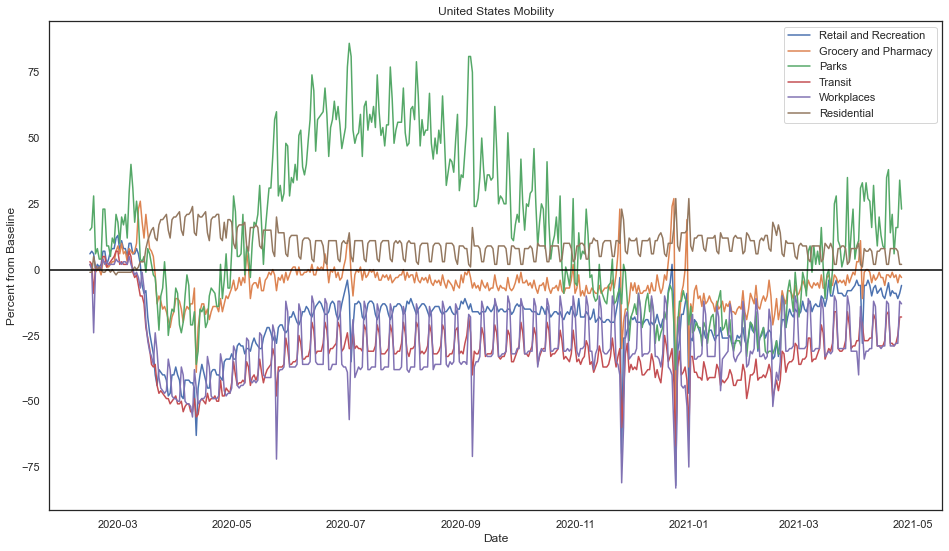

In [5]:
us_df = places_df[(places_df['sub_region_1'].isnull()) & (places_df['sub_region_2'].isnull())]

us_df.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'Retail and Recreation', 'grocery_and_pharmacy_percent_change_from_baseline':'Grocery and Pharmacy', 
                        'parks_percent_change_from_baseline' : 'Parks', 'transit_stations_percent_change_from_baseline': 'Transit', 
                        'workplaces_percent_change_from_baseline' : 'Workplaces', 'residential_percent_change_from_baseline': 'Residential'
                       })



date = us_df['date']
date2 = pd.to_datetime(date, format="%Y/%m/%d")
plt.rcParams["figure.figsize"] = [16,9]

categories =['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 
             'residential_percent_change_from_baseline']
#categories =[ 'Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit', 'Workplaces', 'Residential']
for category in categories:
        plt.plot(date2, us_df[category], label=category)

        
def x_axis_dates(ax=None, fig=None):
   
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()
    

    
mylabels =[ 'Retail and Recreation', 'Grocery and Pharmacy', 'Parks', 'Transit', 'Workplaces', 'Residential']    
plt.xlabel('Date')
plt.axhline(y = 0, color = 'black', linestyle = '-')
# Set the y axis label of the current axis.
plt.ylabel('Percent from Baseline')
# Set a title of the current axes.
plt.title('United States Mobility')
# show a legend on the plot
plt.legend(mylabels, loc='best')
x_axis_dates
plt.savefig("Images/United States Mobility")

plt.show()

In [6]:
places_df['New Date'] = pd.to_datetime(places_df['date'], format='%Y-%m-%d')

feb_month = places_df['New Date'].map(lambda x: x.month) == 2
feb_df = places_df[feb_month]

mar_month = places_df['New Date'].map(lambda x: x.month) == 3
mar_df = places_df[mar_month]

apr_month = places_df['New Date'].map(lambda x: x.month) == 4
apr_df = places_df[apr_month]

feb2020_df = feb_df[feb_df['New Date'].map(lambda x: x.year) == 2020]
feb2021_df = feb_df[feb_df['New Date'].map(lambda x: x.year) == 2021]

mar2020_df = mar_df[mar_df['New Date'].map(lambda x: x.year) == 2020]
mar2021_df = mar_df[mar_df['New Date'].map(lambda x: x.year) == 2021]

apr2020_df = apr_df[apr_df['New Date'].map(lambda x: x.year) == 2020]
apr2021_df = apr_df[apr_df['New Date'].map(lambda x: x.year) == 2021]



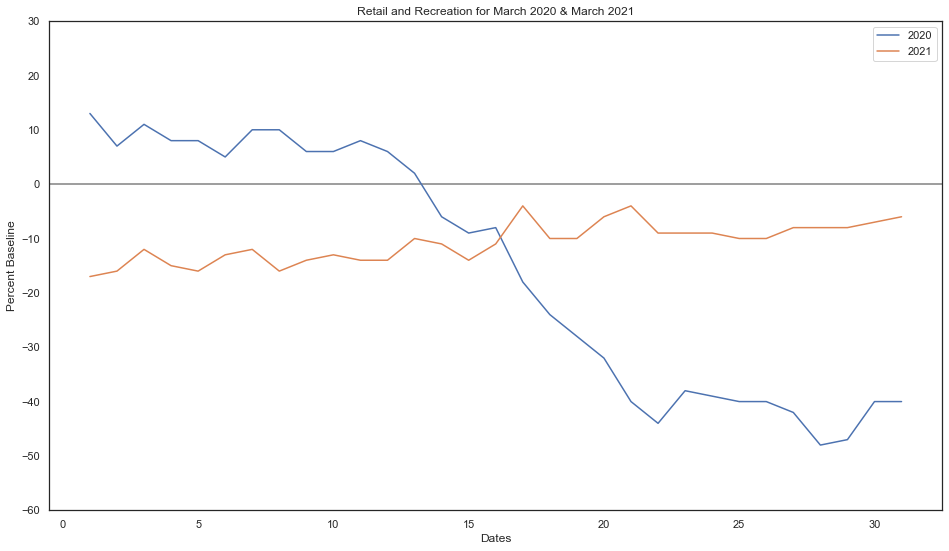

In [7]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day

plt.plot(mar2020_df['month'], mar2020_df['retail_and_recreation_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['retail_and_recreation_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Retail and Recreation for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Retail and Recreation for March 2020 & March 2021")

plt.show()

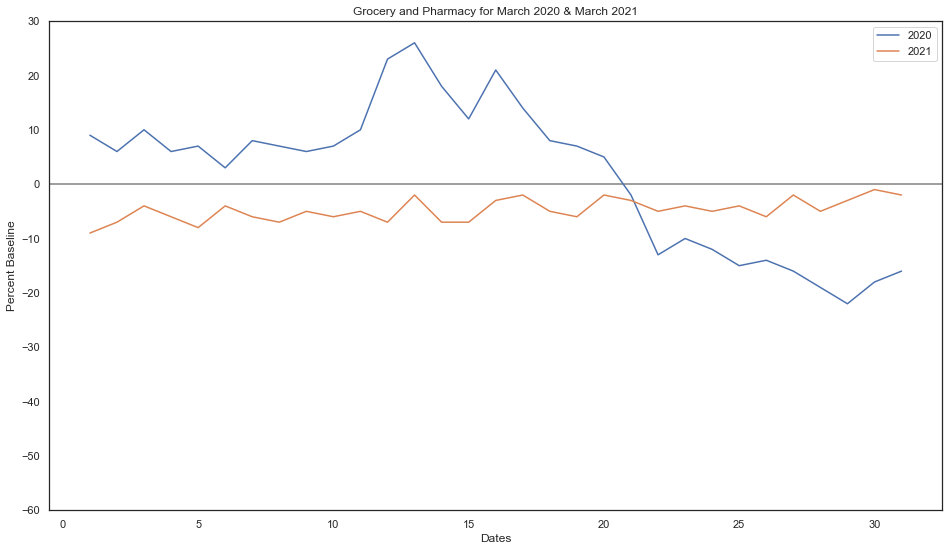

In [8]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Grocery and Pharmacy for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Grocery and Pharmacy for March 2020 & March 2021")



plt.show()

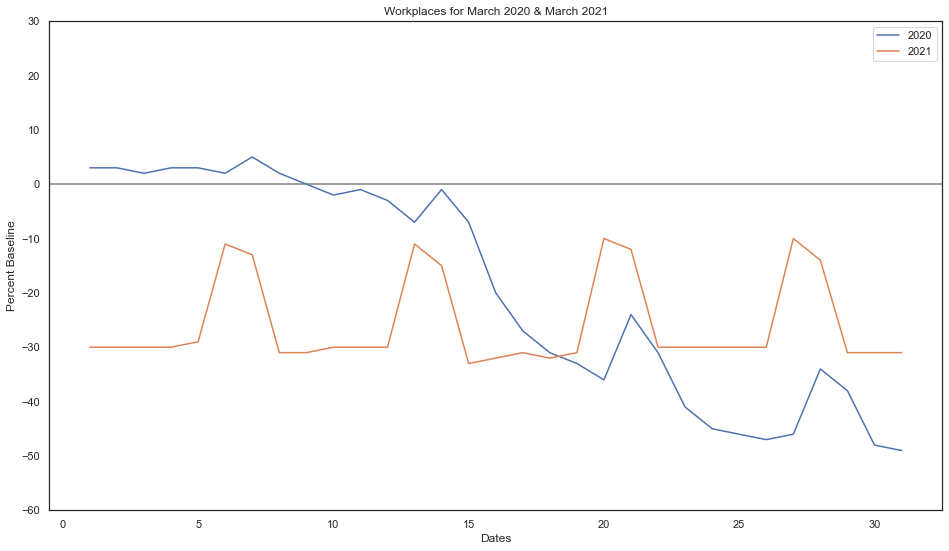

In [9]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['workplaces_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['workplaces_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Workplaces for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Workplaces for March 2020 & March 2021")


plt.show()

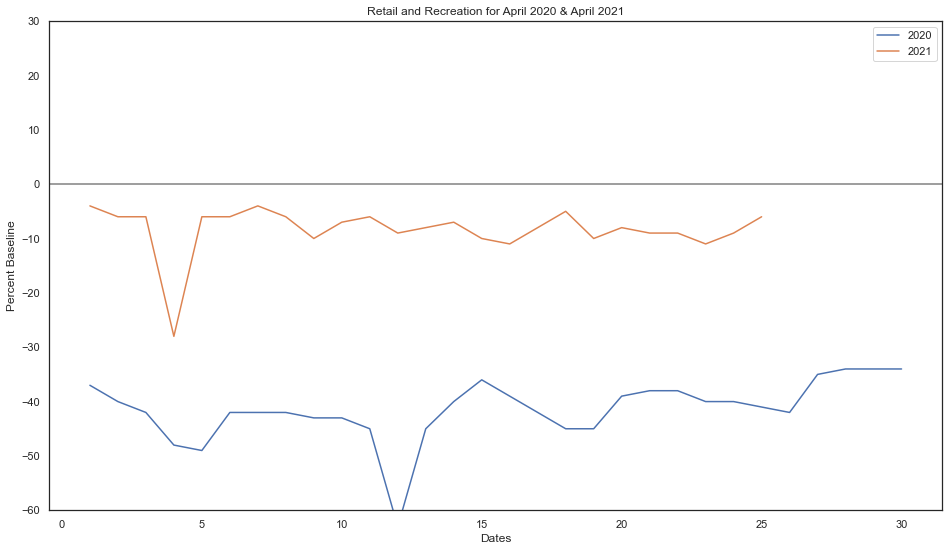

In [10]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['retail_and_recreation_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['retail_and_recreation_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Retail and Recreation for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Retail and Recreation for April 2020 & April 2021")


plt.show()



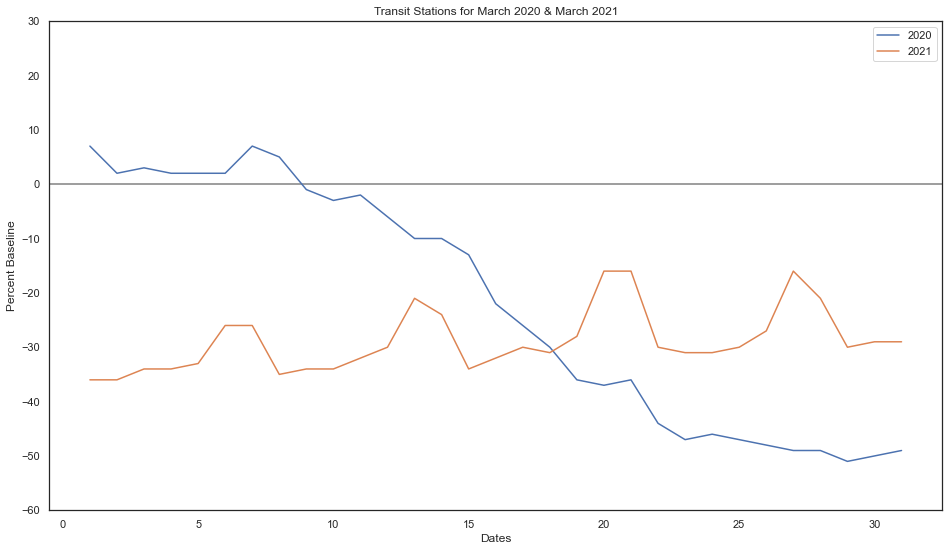

In [11]:
labels = ['March 2020', 'March 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
mar2020_df["month"] = mar2020_df["New Date"].dt.day
mar2021_df["month"] = mar2021_df["New Date"].dt.day
plt.plot(mar2020_df['month'], mar2020_df['transit_stations_percent_change_from_baseline'], label = '2020')
plt.plot(mar2021_df['month'], mar2021_df['transit_stations_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Transit Stations for March 2020 & March 2021')
# # show legend
plt.legend()
plt.savefig("Images/Transit Stations for March 2020 & March 2021")



plt.show()

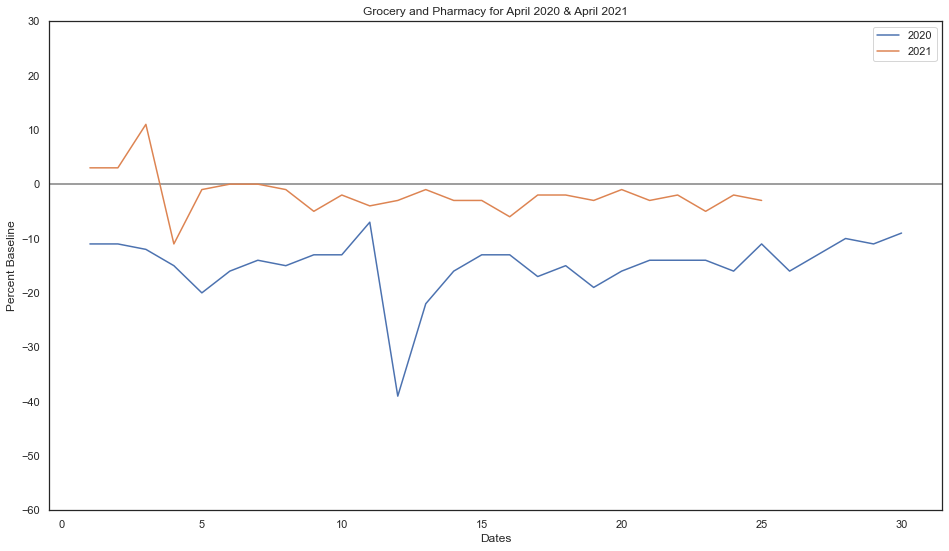

In [12]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['grocery_and_pharmacy_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Grocery and Pharmacy for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Grocery and Pharmacy for April 2020 & April 2021")


plt.show()

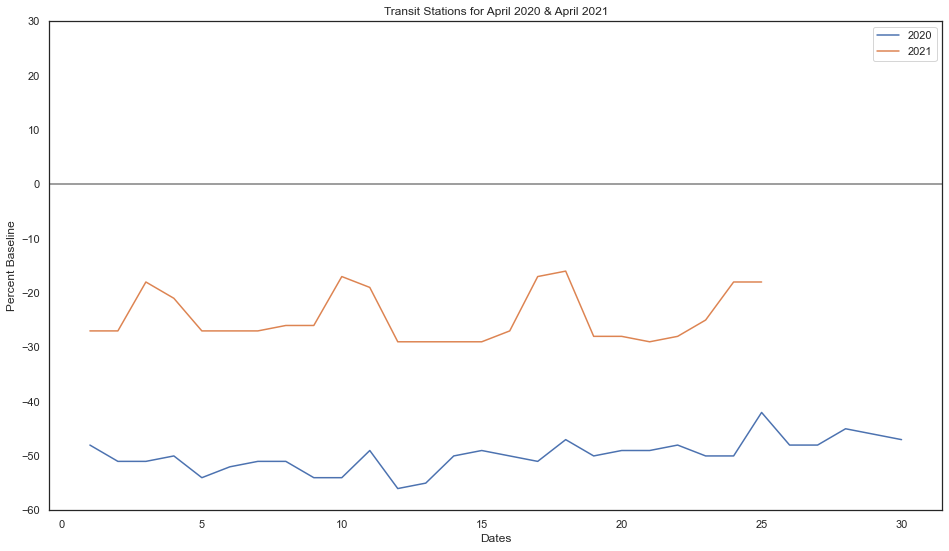

In [13]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
mar2020_df = mar2020_df[mar2020_df['sub_region_1'].isnull()]
mar2021_df = mar2021_df[mar2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['transit_stations_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['transit_stations_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Transit Stations for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Transit Stations for April 2020 & April 2021")


plt.show()

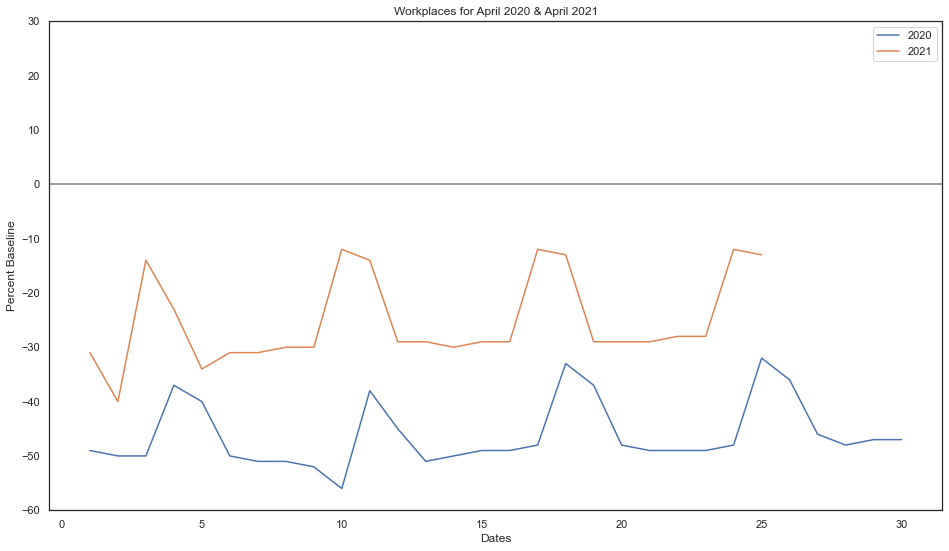

In [14]:
labels = ['April 2020', 'April 2021']

x = np.arange(len(labels))  # the label locations
width = .35 #  the width of the bars

plt.ylim([-60, 30])
plt.axhline(y = 0, color = 'grey', linestyle = '-')

# Data
apr2020_df = apr2020_df[apr2020_df['sub_region_1'].isnull()]
apr2021_df = apr2021_df[apr2021_df['sub_region_1'].isnull()]

# plt.figure(figsize=(20,10))
apr2020_df["month"] = apr2020_df["New Date"].dt.day
apr2021_df["month"] = apr2021_df["New Date"].dt.day
plt.plot(apr2020_df['month'], apr2020_df['workplaces_percent_change_from_baseline'], label = '2020')
plt.plot(apr2021_df['month'], apr2021_df['workplaces_percent_change_from_baseline'], label = '2021')

plt.ylabel('Percent Baseline')
plt.xlabel('Dates')
plt.title('Workplaces for April 2020 & April 2021')
# # show legend
plt.legend()
plt.savefig("Images/Workplaces for April 2020 & April 2021")



plt.show()

In [20]:
places_df

,Unnamed: 0,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Date
0,0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0,2020-02-15
1,1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0,2020-02-16
2,2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0,2020-02-17
3,3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0,2020-02-18
4,4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...
1111363,299298,Wyoming,Weston County,2021-04-19,NaN,NaN,NaN,NaN,-26.0,NaN,2021-04-19
1111364,299299,Wyoming,Weston County,2021-04-20,NaN,NaN,NaN,NaN,-15.0,NaN,2021-04-20
1111365,299300,Wyoming,Weston County,2021-04-21,NaN,NaN,NaN,NaN,-23.0,NaN,2021-04-21
1111366,299301,Wyoming,Weston County,2021-04-22,NaN,NaN,NaN,NaN,-14.0,NaN,2021-04-22


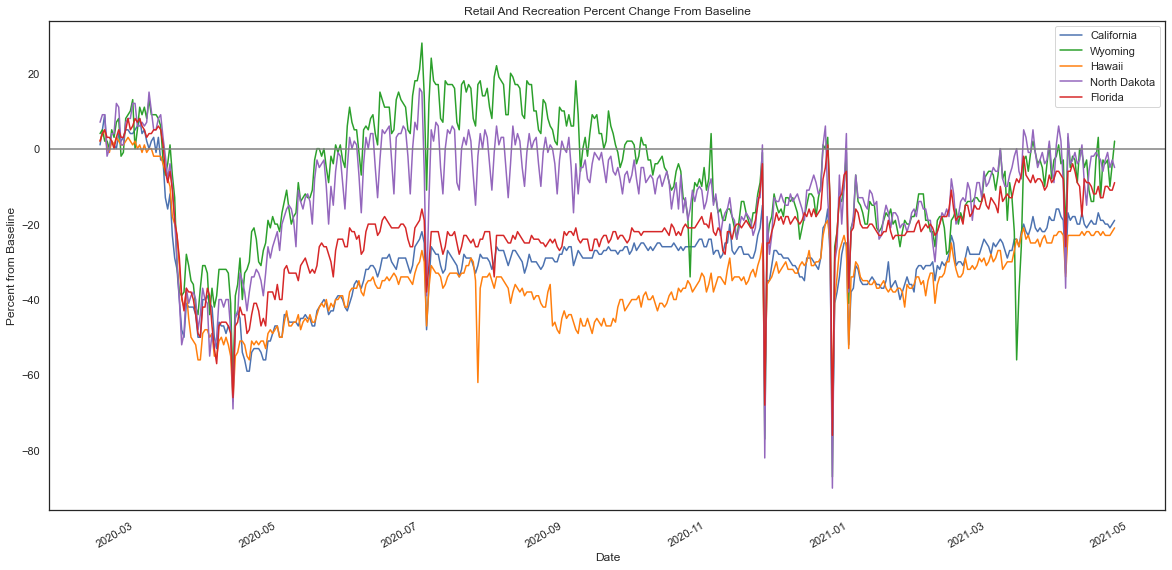

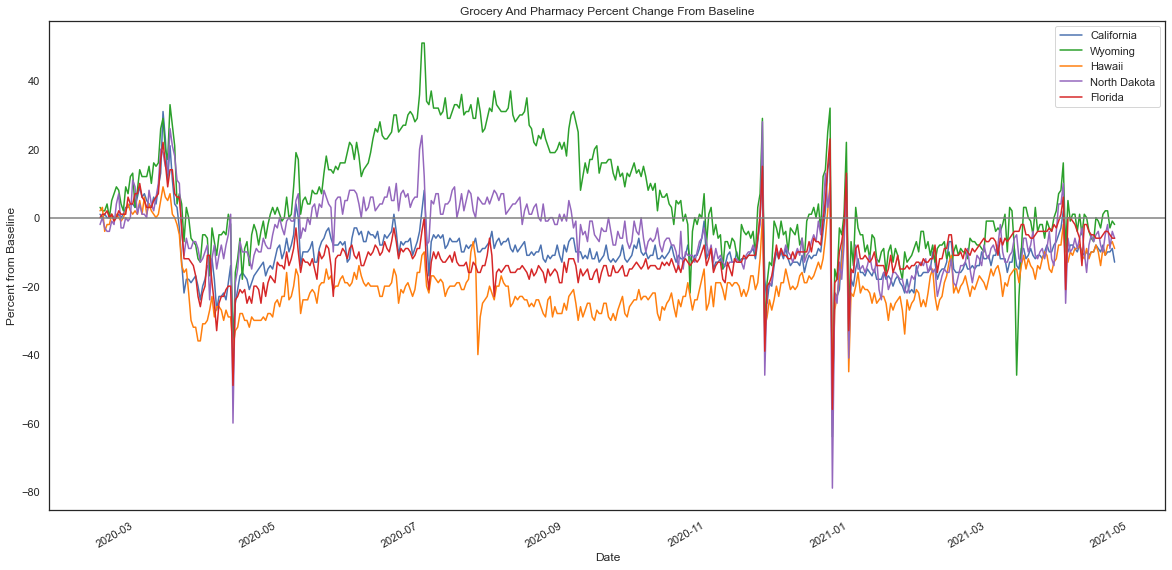

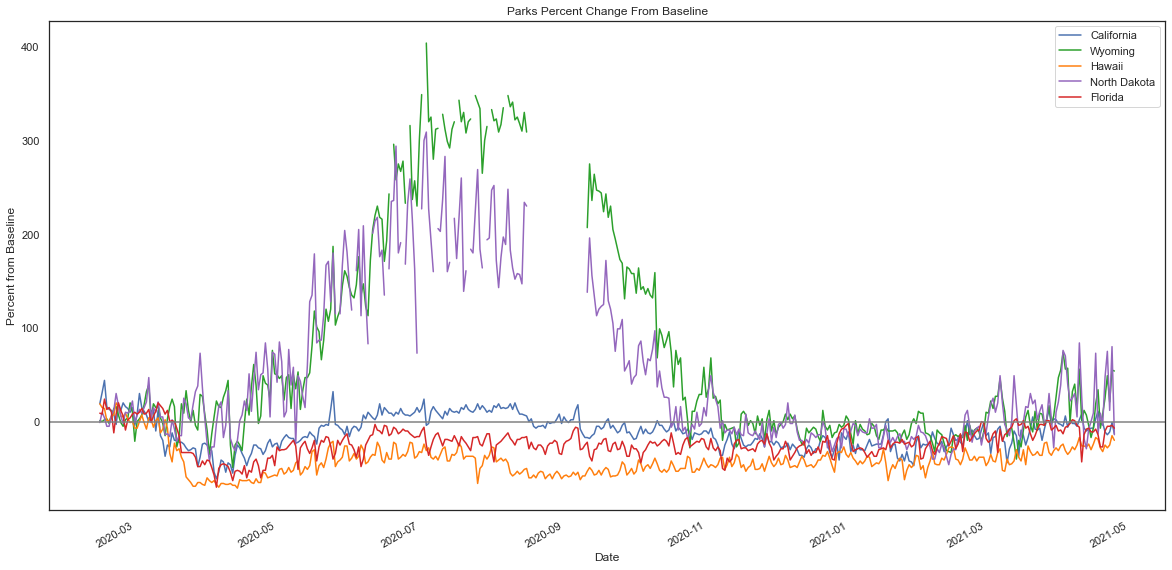

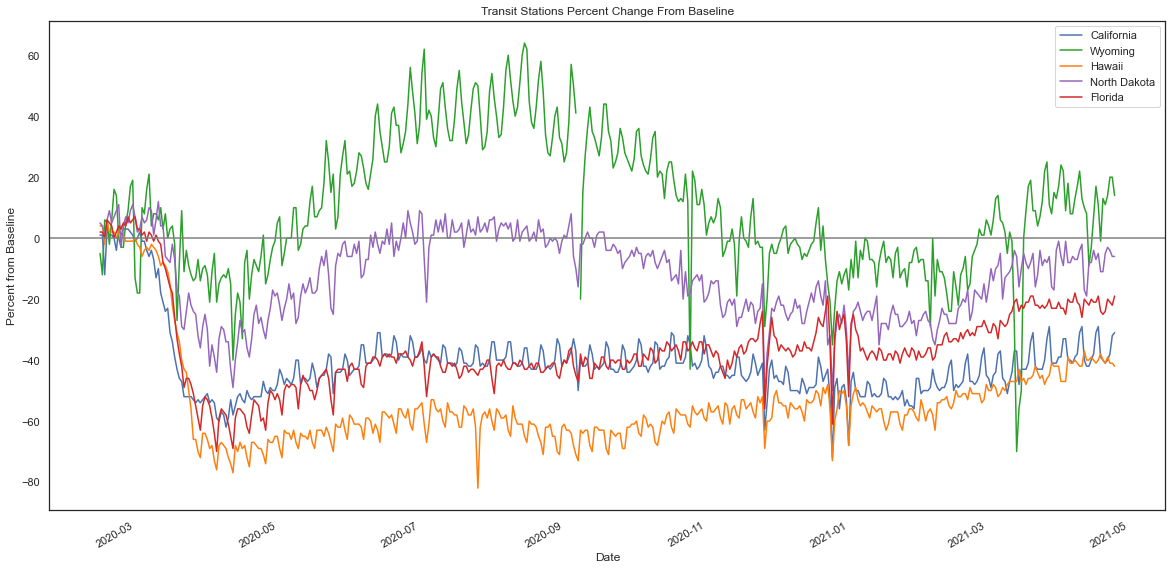

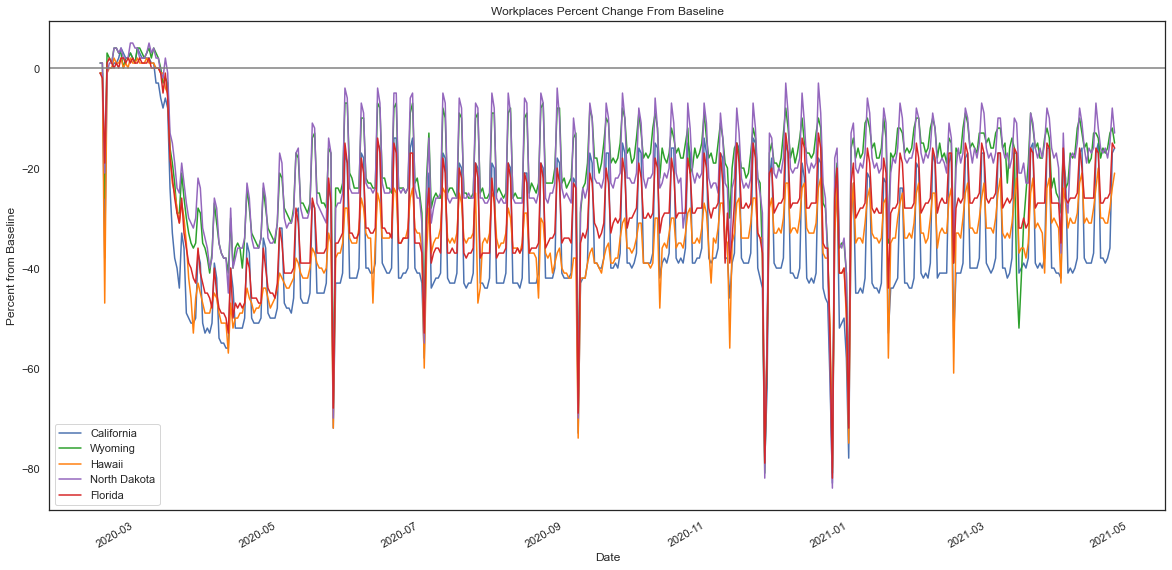

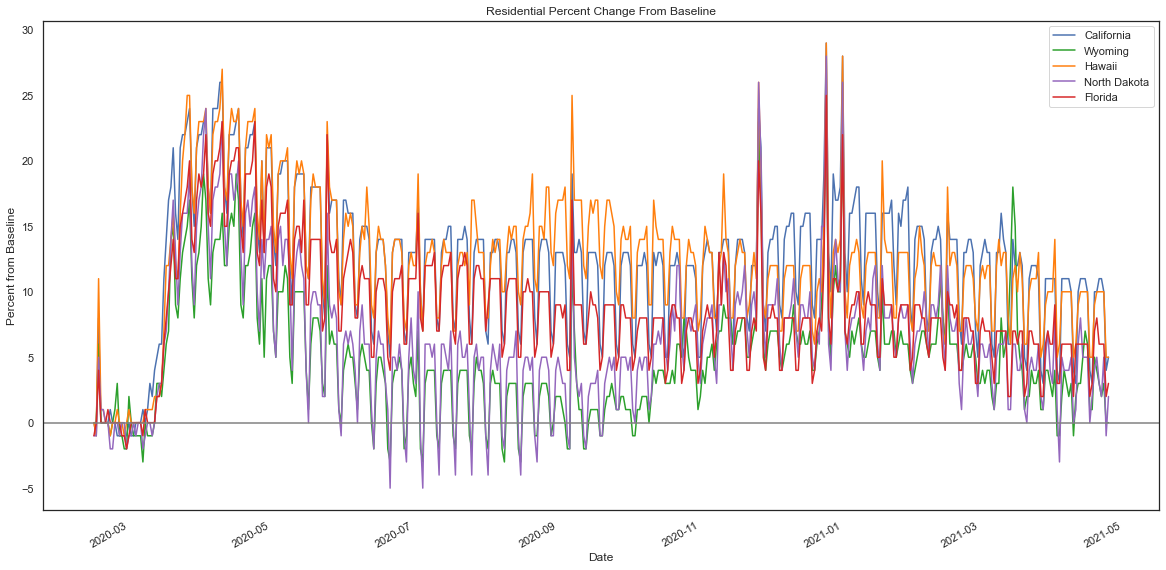

In [25]:
date2 = pd.to_datetime(places_df['date'], format="%Y/%m/%d")
places_df['date'] = date2
#function to format dates
def x_axis_dates(ax=None, fig=None):
   
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()


#plotting interesting states against one another for all variables
columns = ['retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline']

cali_df = places_df[(places_df['sub_region_1'] == 'California') & (places_df['sub_region_2'].isnull())]
wyoming_df = places_df[(places_df['sub_region_1'] == 'Wyoming') & (places_df['sub_region_2'].isnull())]
hawaii_df = places_df[(places_df['sub_region_1'] == 'Hawaii') & (places_df['sub_region_2'].isnull())]
dakota_df = places_df[(places_df['sub_region_1'] == 'North Dakota') & (places_df['sub_region_2'].isnull())]
florida_df = places_df[(places_df['sub_region_1'] == 'Florida') & (places_df['sub_region_2'].isnull())]

for column in columns:
    plt.figure(figsize=(20, 10))
    plt.plot(cali_df['date'], cali_df[column])
    plt.plot(wyoming_df['date'], wyoming_df[column], color='tab:green')
    plt.plot(hawaii_df['date'], hawaii_df[column], color='tab:orange')
    plt.plot(dakota_df['date'], dakota_df[column], color='tab:purple')
    plt.plot(florida_df['date'], florida_df[column], color='tab:red')

    labels= ['California', 'Wyoming', 'Hawaii', 'North Dakota', 'Florida'] #change the order so this makes sense
    #format the new plot
    title = column.replace('_', ' ').title()  # formatting the column names so they are't super ugly graph names. 
    plt.title(f'{title}')
    plt.xlabel('Date')
    # Set the y axis label of the current axis.
    plt.ylabel('Percent from Baseline')
    plt.xticks(rotation=45)
    # show a legend on the plot
    plt.legend(labels=labels)
    plt.axhline(y = 0, color = 'grey', linestyle = '-')
    x_axis_dates()
    plt.savefig(f"Images/state_{title}")

    plt.show()


In [26]:
raw_states_df = places_df[places_df['sub_region_1'].notnull() & places_df['sub_region_2'].isnull()]

raw_states_cases_df = pd.read_csv('data/nyt_state_data.csv')

date = pd.to_datetime(raw_states_df['date'], format="%Y/%m/%d")
raw_states_df['date'] = date

date = pd.to_datetime(raw_states_cases_df['date'], format="%Y/%m/%d")
raw_states_cases_df['date'] = date

raw_states_cases_df['sub_region_1'] = raw_states_cases_df['state']

states_df = pd.merge(raw_states_cases_df, raw_states_df, on=['date', 'sub_region_1'])

#this code grabs state abbrivations, which is a requirement for the choropleth function
all_states = states_df['sub_region_1']
state_abbrev = []
for state in all_states:
    state_abbrev.append(us_state_abbrev[state])
states_df['state'] = state_abbrev

states_group = states_df.groupby('state')
for_plotting_df = states_group.mean()
for_plotting_df.reset_index(inplace=True)

fig = px.choropleth(for_plotting_df,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color_continuous_scale="Viridis",
                    range_color=(-26, 0),
                    color="retail_and_recreation_percent_change_from_baseline",  # DataFrame column with color values
                    hover_name="retail_and_recreation_percent_change_from_baseline", # DataFrame column hover info
                    locationmode = 'USA-states',
                    labels={'retail_and_recreation_percent_change_from_baseline':'Retail Visits'}) # Set to plot as US States
fig.update_layout(
    title_text = 'Average Change in Retail Visits from Baseline', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

fig.update_layout(margin={"r":20,"t":40,"l":10,"b":20})
fig.show() # Output the plot to the screen


In [27]:
#ANOVA where H0: there is no significant difference between the various statewide numbers. HA: The statewide numbers are statistically different. 

#make state dataframes
cali_df = places_df[(places_df['sub_region_1'] == 'California') & (places_df['sub_region_2'].isnull())]
wyoming_df = places_df[(places_df['sub_region_1'] == 'Wyoming') & (places_df['sub_region_2'].isnull())]
hawaii_df = places_df[(places_df['sub_region_1'] == 'Hawaii') & (places_df['sub_region_2'].isnull())]
dakota_df = places_df[(places_df['sub_region_1'] == 'North Dakota') & (places_df['sub_region_2'].isnull())]
florida_df = places_df[(places_df['sub_region_1'] == 'Florida') & (places_df['sub_region_2'].isnull())]

stats.f_oneway(cali_df['retail_and_recreation_percent_change_from_baseline'], wyoming_df['retail_and_recreation_percent_change_from_baseline'], hawaii_df['retail_and_recreation_percent_change_from_baseline'], dakota_df['retail_and_recreation_percent_change_from_baseline'] , florida_df['retail_and_recreation_percent_change_from_baseline'])

F_onewayResult(statistic=314.93995365957215, pvalue=6.332117146935177e-214)